# Welcome! This is Jupyter Notebook, a very useful tool for data analyses. 

# Below is sample code to help you start analyzing data using Python.
-----


### To execute each "Cell" below press:

### Ctrl + Enter (executes code in current cell)
### OR
### Shift + Ctrl (executes code in current cell and then selects the below cell)

### First we need to import some libraries and establish a connection to our data. This could be from a CSV, Excel, or several other sources. In our case, we want to establish a connection to the data we've scraped located in our SQLite database.

In [73]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')


conn = sqlite3.connect('CFBData.db')

### We need to now import data from out database. We're going to import into a Pandas DataFrame. 

### Left of the "=" we designate a DataFrame. To the right, we use a Pandas method which will allow us to write some SQL and select the connection we'll use for that SQL. We will create separate Dataframe for each table we created in our database. 

In [12]:
Coach = pd.read_sql_query('SELECT * FROM Coach', conn)
Conference = pd.read_sql_query('SELECT * FROM Conference', conn)
SeasonResults = pd.read_sql_query('SELECT * FROM SeasonResults', conn)
TeamSplits = pd.read_sql_query('SELECT * FROM TeamSplits', conn)
TeamStatistics = pd.read_sql_query('SELECT * FROM TeamStatistics', conn)

### Lets now examine 1 of these data structures. A quick method to view data stored in a DataFrame is the head() method. 

In [14]:
TeamStatistics.head()

,SchoolName,Year,Side,GamesPlayed,PassingCompletions,PassingAtmpts,PassingCompletePct,PassingTotYds,PassingTDs,RushingAtmpts,...,TotalOffenseAvgYds,FirstDownsByPassing,FirstDownsByRushing,FirstDownsByPenalty,FirstDownsTot,PenaltiesTot,PenaltiesYds,TurnoversByFumble,TurnoversByInt,TurnoversTot
0,air-force,2007,Offense,13,10.0,16.5,60.7,119.8,0.7,55.5,...,5.8,5.4,14.8,1.2,21.3,4.8,44.2,1.0,0.4,1.4
1,air-force,2007,Defense,13,19.2,32.8,58.5,232.2,1.2,39.5,...,5.1,10.4,8.4,1.2,19.9,5.5,42.1,1.0,1.2,2.2
2,air-force,2008,Offense,13,5.7,10.6,53.6,82.2,0.7,59.8,...,5.0,2.8,14.8,1.0,18.5,5.6,46.3,0.8,0.5,1.3
3,air-force,2008,Defense,13,16.8,28.8,58.4,199.9,1.2,38.5,...,5.1,10.1,7.8,1.3,19.2,5.5,42.3,1.4,0.9,2.3
4,air-force,2009,Offense,13,5.9,11.8,50.3,88.4,0.6,62.7,...,5.0,3.6,15.6,0.8,20.1,4.9,45.0,0.7,0.2,0.9


### A DataFrame appears very similar to a "Table" in SQL or a "Sheet" in Excel. This "table-like" structure is composed an index (see that column to the left which currently doesn't have a header?) and various columns (they're actually not columns, but groups of individual "series").

### Let's dive in and start examining our data. First, let's find a school and select a year, since data 10 years ago may not be interesting to us.

### Notice the syntax used to slice the data. We have:

### 1. A TeamStatistics with brackets "[]"
### 2. References to specific columns within TeamStatistics joined by an AND "&" operator

In [19]:
TeamStatistics[(TeamStatistics['SchoolName'] == 'alabama') & (TeamStatistics['Year'] == '2015')]

,SchoolName,Year,Side,GamesPlayed,PassingCompletions,PassingAtmpts,PassingCompletePct,PassingTotYds,PassingTDs,RushingAtmpts,...,TotalOffenseAvgYds,FirstDownsByPassing,FirstDownsByRushing,FirstDownsByPenalty,FirstDownsTot,PenaltiesTot,PenaltiesYds,TurnoversByFumble,TurnoversByInt,TurnoversTot
52,alabama,2015,Offense,15,20.1,29.7,67.5,227.1,1.5,42.8,...,5.9,9.8,10.5,1.7,22.0,5.9,55.7,0.5,0.7,1.1
53,alabama,2015,Defense,15,16.7,33.0,50.5,200.5,1.1,31.2,...,4.3,8.6,4.5,1.8,14.9,6.0,46.4,0.5,1.3,1.8
2198,alabama,2015,Offense,15,20.1,29.7,67.5,227.1,1.5,42.8,...,5.9,9.8,10.5,1.7,22.0,5.9,55.7,0.5,0.7,1.1
2199,alabama,2015,Defense,15,16.7,33.0,50.5,200.5,1.1,31.2,...,4.3,8.6,4.5,1.8,14.9,6.0,46.4,0.5,1.3,1.8


### Looks like we have duplicates. Since we don't want that to be part of our analyses, let's remove them.

### To remove them, we'll use the "drop_duplicates()" method.

In [62]:
TeamStatistics = TeamStatistics.drop_duplicates()


TeamStatistics[(TeamStatistics['SchoolName'] == 'alabama') & (TeamStatistics['Year'] == '2015')]

,SchoolName,Year,Side,GamesPlayed,PassingCompletions,PassingAtmpts,PassingCompletePct,PassingTotYds,PassingTDs,RushingAtmpts,...,TotalOffenseAvgYds,FirstDownsByPassing,FirstDownsByRushing,FirstDownsByPenalty,FirstDownsTot,PenaltiesTot,PenaltiesYds,TurnoversByFumble,TurnoversByInt,TurnoversTot
52,alabama,2015,Offense,15,20.1,29.7,67.5,227.1,1.5,42.8,...,5.9,9.8,10.5,1.7,22.0,5.9,55.7,0.5,0.7,1.1
53,alabama,2015,Defense,15,16.7,33.0,50.5,200.5,1.1,31.2,...,4.3,8.6,4.5,1.8,14.9,6.0,46.4,0.5,1.3,1.8


### So, it looks like Alabama had a Passing Completion Percetage (PassingCompletePct) of roughly 68% on offense. I wonder how that compares to other schools?

### For our example I've chosen to use the median. 

In [64]:
PassCompletePct2015 = TeamStatistics[(TeamStatistics['Year'] == '2015') & (TeamStatistics['Side'] == 'Offense')]


medianPassingCompletePct2015 = PassCompletePct2015['PassingCompletePct'].median()
medianPassingCompletePct2015 = round(medianPassingCompletePct2015,0)


print("Average Passing Completion Percentage in 2015: "+str(medianPassingCompletePct2015)+'%')

Average Passing Completion Percentage in 2015: 59.0%


### Not bad. Let's take a look at the top performers.  To do this we'll use Matplotlib. A simple bar graph should suffice.

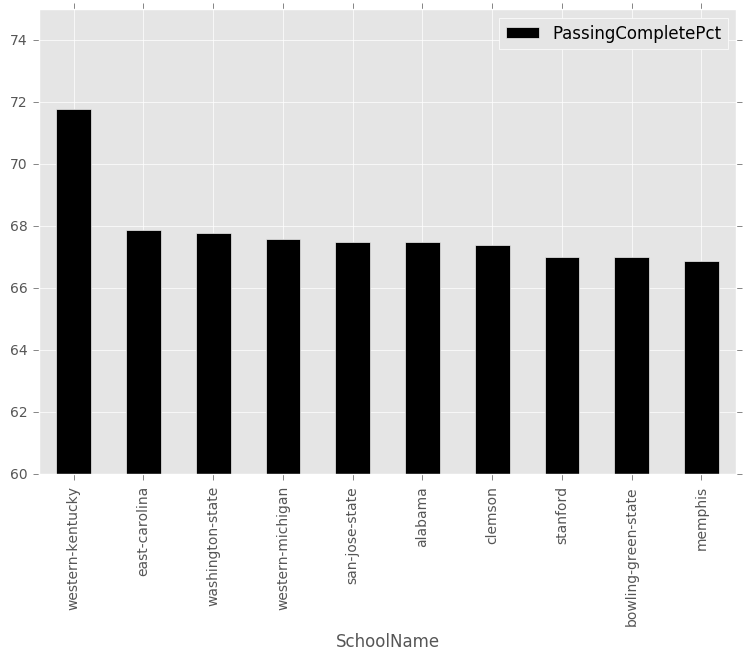

In [76]:
TopPerformers = PassCompletePct2015.sort_values('PassingCompletePct', ascending = False).head(10).copy()

TopPerformers.plot(x = 'SchoolName'
                         ,y = 'PassingCompletePct'
                         ,kind = 'bar'
                         ,figsize = [9,6]
                         ,color = 'k'
                         ,ylim = [60,75])